# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, NuSVR, LinearSVR, SVC, NuSVC, LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

from collections import Counter

import itertools as it
import nltk as nltk
from nltk.corpus import stopwords

(11141, 3)


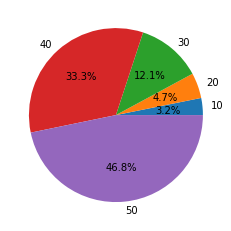

In [34]:
# r = pd.read_csv('scrap.csv')[['hotel','commentaire','note']]
# reviews = pd.concat([reviews,r])
# reviews.to_csv('reviews.csv',index=False)

reviews = pd.read_csv('reviews.csv')
print(r.shape)
l=range(10,60,10)
plt.pie([reviews.note.value_counts()[i] for i in l],labels=l,autopct='%1.1f%%')
plt.show()

In [3]:
# Enlever ponctuation et mots de liaison inutiles
def sup_ponctuations(commentaires):
    ponctuations = '''!()-[]{};:'"\,./?@#$%^&@*_~'''
    pas_de_ponc = ""
    for carac in commentaires:
        if carac not in ponctuations:
            pas_de_ponc = pas_de_ponc + carac
    return pas_de_ponc.lower()

def mots_inutiles(commentaires):
    mots = stopwords.words('french')
    comm_nettoyés = " "
    for mot in commentaires.split():
        if mot not in mots:
            comm_nettoyés = comm_nettoyés + ' ' + mot
    return comm_nettoyés

In [4]:
reviews["commentaire"] = reviews["commentaire"].str.lower().apply(mots_inutiles,sup_ponctuations)

# Analyse des données

            0     1
0        très  6492
1     chambre  3739
2           a  3544
3        bien  2634
4       hôtel  2493
5   personnel  2407
6       petit  2321
7     l'hôtel  1921
8         cet  1791
9        tout  1714
10          !  1621
11   déjeuner  1541
12   chambres  1494
13       plus  1471
14        bon  1461
15      c'est  1426
16       j'ai  1316
17        peu  1131
18      salle  1121
19         si  1053


<BarContainer object of 20 artists>

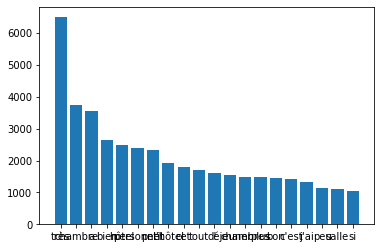

In [5]:
# Mots les plus fréquents
freq = pd.DataFrame(Counter(' '.join(reviews['commentaire']).split()).most_common(20))
print(freq)
plt.bar(freq[0],freq[1])

In [6]:
vec = CountVectorizer(stop_words = 'english')
'''
convert a collection of text documents to a matrix of token counts, sparse representation
default number of features = vocabulary size
'''

X = vec.fit_transform(reviews.commentaire).toarray()

print(X.shape)

is_pos = reviews.note.map({50:1,40:1,30:0,20:0,10:0})
is_pos

(6141, 15702)


0     1
1     1
2     1
3     1
4     1
     ..
76    0
77    1
78    1
79    1
80    1
Name: note, Length: 6141, dtype: int64

# Data splitting

In [7]:
y = reviews.note
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=1,stratify=y)
'''
test_size pourcentage de lignes testé
random_state graine du générateur de nombre aléatoire
stratify affecte un label au split stratifié, répartition équitable avec Y
'''
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4298, 15702) (1843, 15702) (4298,) (1843,)


# Modélisation et Performances

In [ ]:
#
param_grid = {'C':[1,2,3],'kernel':['rbf','sigmoid']}
param_grid
#
gscv = GridSearchCV(
    SVC(),
    param_grid,
    cv = 3) #cv par défaut =5
gscv.fit(X_train,Y_train)
print(gscv.best_params_,'\n',gscv.best_score_) #changer les params selon le résultat obtenu, ex réduire C

#
best_model = gscv.best_estimator_
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)
print(pred_train,pred_test)

#
print(classification_report(Y_train,pred_train),'\n',classification_report(Y_test,pred_test))